In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization,LeakyReLU,Concatenate,Resizing
from tensorflow.keras.layers import Conv2DTranspose as Deconvolution

from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from consts import *
from utils import *
# from tensorflow import set_random_seed

tf.keras.utils.set_random_seed(123)
# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.Session(graph=tf.get_default_graph())
# sess = tf.compat.v1.Session()
# tf.keras.backend.set_session(sess)

np.random.seed(1)

print(os.listdir("."))

['.git', '.gitignore.txt', '.ipynb_checkpoints', 'consts.py', 'kaggle.py', 'main.ipynb', 'output', 'output - Copy', 'paper.ipynb', 'paper.py', 'paper_temp.keras', 'README.md', 'test.txt', 'training_log', 'training_set', 'utils.py', 'validation_set', '__pycache__']


In [2]:
from kaggle import KaggleModel
from paper import PaperModel
input_sample = Input(shape=(HEIGHT, WIDTH,1))
model = PaperModel(input_sample)
# model = KaggleModel(input_sample)



Model: "lsrn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 lsrn_conv_0 (Conv2D)        (None, 256, 256, 64)      640       
                                                                 
 lsrn_conv_1 (Conv2D)        (None, 256, 256, 64)      36928     
                                                                 
 lsrn_bn_1 (BatchNormalizat  (None, 256, 256, 64)      256       
 ion)                                                            
                                                                 
 lsrn_conv_2 (Conv2D)        (None, 128, 128, 128)     73856     
                                                                 
 lsrn_conv_3 (Conv2D)        (None, 128, 128, 128)     147584    
                                                              

In [3]:
def load_datas(path):
    datapoints = []
    for image_type in os.listdir(path):
        print(f'category: {image_type}')
        for file in os.listdir(os.path.join(path, image_type)):
            is_image = (file[-3:] == 'jpg' or file[-4:] == 'jpeg' or file[-3:] == 'png')
            if not is_image:
                continue
            d = model.load_datapoint(os.path.join(path, image_type, file))
            if d:
                datapoints.append(d)
    # datapoints = np.array(datapoints)
    return datapoints
    
training_data = load_datas("./training_set/")
validation_data = load_datas("./validation_set/")
print(len(training_data))
print(len(validation_data))

category: iconography
category: iconography
97
98


In [4]:
def generate_inputs(datapoints):
    length = len(datapoints)
    i = 0
    while True:
        # x_input = x[i].reshape(1, HEIGHT, WIDTH, 1)
        # y_input = y[i].reshape(1, HEIGHT, WIDTH, 2)
        datapoint = datapoints[i]
        i += 1
        if i == length:
            i = 0
        yield datapoint
        
model.fit(generate_inputs(training_data), generate_inputs(validation_data))

Epoch 721/780
50/50 [==============================] - 75s 1s/step - loss: 0.1739 - val_loss: 0.5126
Epoch 722/780
50/50 [==============================] - 74s 1s/step - loss: 0.2185 - val_loss: 0.2702
Epoch 723/780
50/50 [==============================] - 74s 1s/step - loss: 0.1645 - val_loss: 0.4192
Epoch 724/780
50/50 [==============================] - 74s 1s/step - loss: 0.2196 - val_loss: 0.2760
Epoch 725/780
50/50 [==============================] - 74s 1s/step - loss: 0.1640 - val_loss: 0.3700
Epoch 726/780
50/50 [==============================] - 74s 1s/step - loss: 0.2214 - val_loss: 0.2749
Epoch 727/780
50/50 [==============================] - 74s 1s/step - loss: 0.1623 - val_loss: 0.3818
Epoch 728/780
50/50 [==============================] - 74s 1s/step - loss: 0.2254 - val_loss: 0.2592
Epoch 729/780
50/50 [==============================] - 74s 1s/step - loss: 0.1624 - val_loss: 0.2301
Epoch 730/780
50/50 [==============================] - 74s 1s/step - loss: 0.2183 - val_los

In [5]:
import random

def show_result(file):
    plt.figure(figsize=(30,20))
    plt.subplot(5,5,1)
    image, image_gray = read_image(file)
    
    image_gray =  cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB)
    plt.imshow(image_gray)
    
    plt.subplot(5,5,1+1)
    image_predict = model.get_output(file, image)
    plt.title("Predicted Image")
    plt.imshow(image_predict)

    plt.subplot(5,5,1+2)
    plt.title("Ground truth")
    plt.imshow(image)

def show_random_result(path):
    file = random.choice(os.listdir(path))
    file = os.path.join(path, file)
    show_result(file)

1/1 [==============================] - 1s 651ms/step


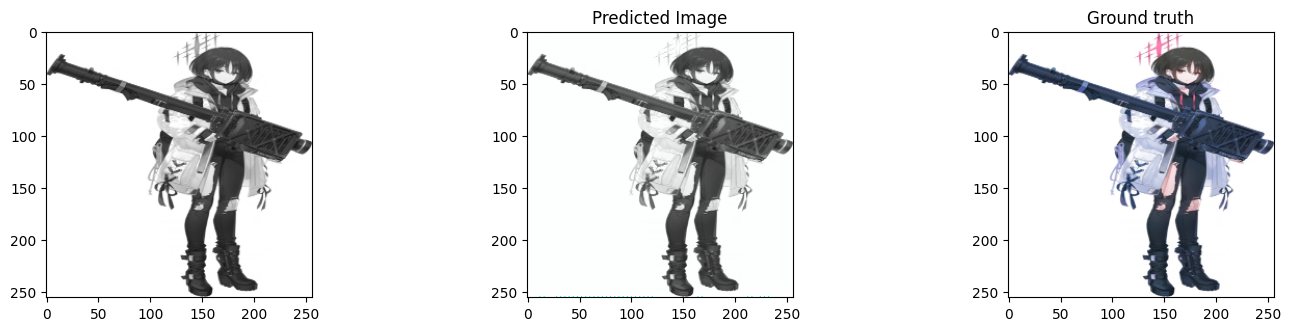

In [10]:
show_random_result("training_set/iconography")

In [ ]:
show_result("https://static.wikia.nocookie.net/blue-archive/images/4/48/Kisaki_Portrait.png/revision/latest?cb=20230126064058")